<a href="https://colab.research.google.com/github/anan-zewil/HMS-Desktop/blob/main/classification(insurance_claims%20dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("insurance_claims.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
#check nulls
df.isnull().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


In [ ]:
df.replace('?', np.nan, inplace = True)
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,NaN,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [ ]:
df.isnull().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


In [ ]:
#fill missing values with mode
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])


In [ ]:
# Check for zeros in each column
zeros_in_columns = (df == 0).sum()

print(zeros_in_columns)


months_as_customer               1
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                 798
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                  508
capital-loss                   475
incident_date                    0
incident_type                    0
collision_type                   0
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day        52
number_of_vehicles_involved      0
property_damage                  0
bodily_injuries     

In [ ]:
df.drop(['_c39','insured_zip','policy_bind_date',"umbrella_limit","insured_hobbies","incident_date"
         ,"incident_city","incident_location","auto_make","auto_year","auto_model"
         ,"policy_number","incident_state","insured_relationship",
          "authorities_contacted" ], axis=1, inplace=True)

In [ ]:
# columns_to_fill = ['incident_hour_of_the_day', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim']
# # Fill zeros with the mean of each column
# for column in columns_to_fill:
#     df[column] = df[column].replace(0, df[column].mean())

# df.to_csv('insurance_claims.csv', index=False)


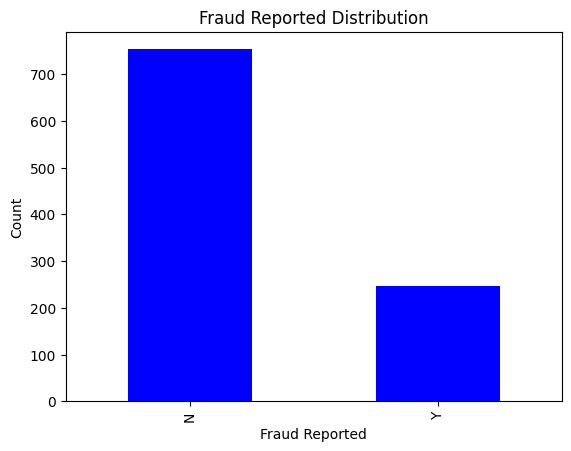

In [ ]:
df['fraud_reported'].value_counts().plot(kind='bar', color='blue')
plt.title('Fraud Reported Distribution')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')
plt.show()

In [ ]:
num_df = df.select_dtypes(include = ['int64'])
num_df.head()

,months_as_customer,age,policy_deductable,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,328,48,1000,53300,0,5,1,1,2,71610,6510,13020,52080
1,228,42,2000,0,0,8,1,0,0,5070,780,780,3510
2,134,29,2000,35100,0,7,3,2,3,34650,7700,3850,23100
3,256,41,2000,48900,-62400,5,1,1,2,63400,6340,6340,50720
4,228,44,1000,66000,-46000,20,1,0,1,6500,1300,650,4550


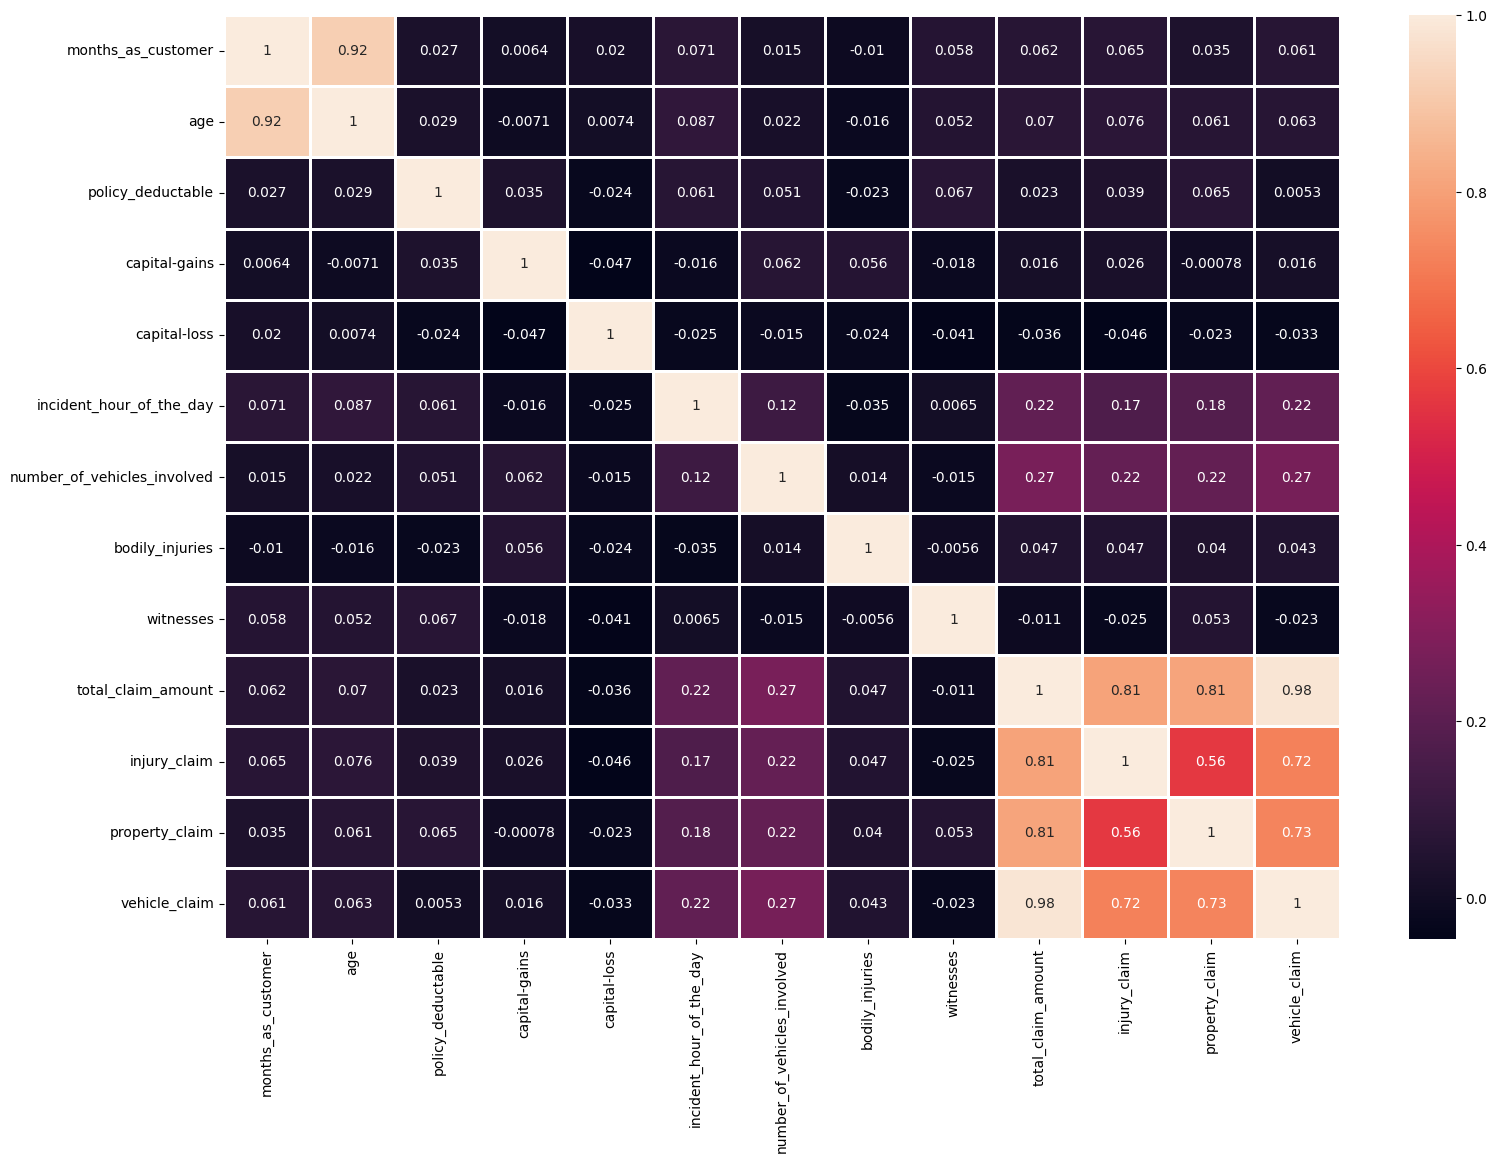

In [ ]:
# checking for correlation using heatmap

plt.figure(figsize = (18, 12))

corr = num_df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

array([[<Axes: title={'center': 'months_as_customer'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'policy_deductable'}>,
        <Axes: title={'center': 'capital-gains'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'incident_hour_of_the_day'}>,
        <Axes: title={'center': 'number_of_vehicles_involved'}>,
        <Axes: title={'center': 'bodily_injuries'}>],
       [<Axes: title={'center': 'witnesses'}>,
        <Axes: title={'center': 'total_claim_amount'}>,
        <Axes: title={'center': 'injury_claim'}>,
        <Axes: title={'center': 'property_claim'}>],
       [<Axes: title={'center': 'vehicle_claim'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

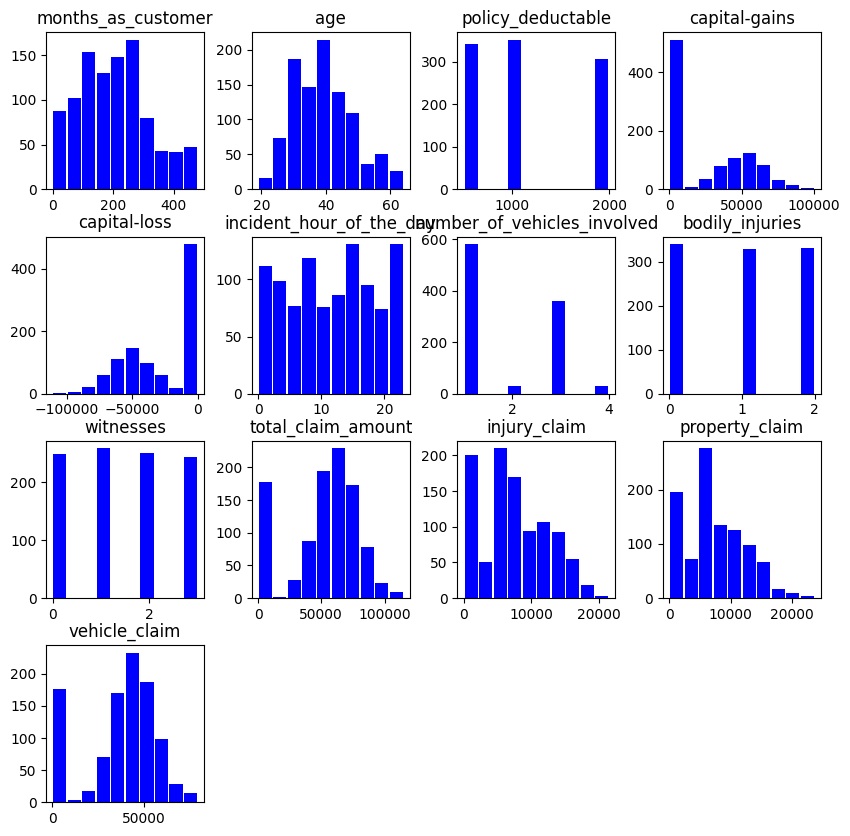

In [ ]:
num_df.hist(bins=10, grid=False, color='blue', zorder=2, rwidth=0.9, figsize=(10, 10))

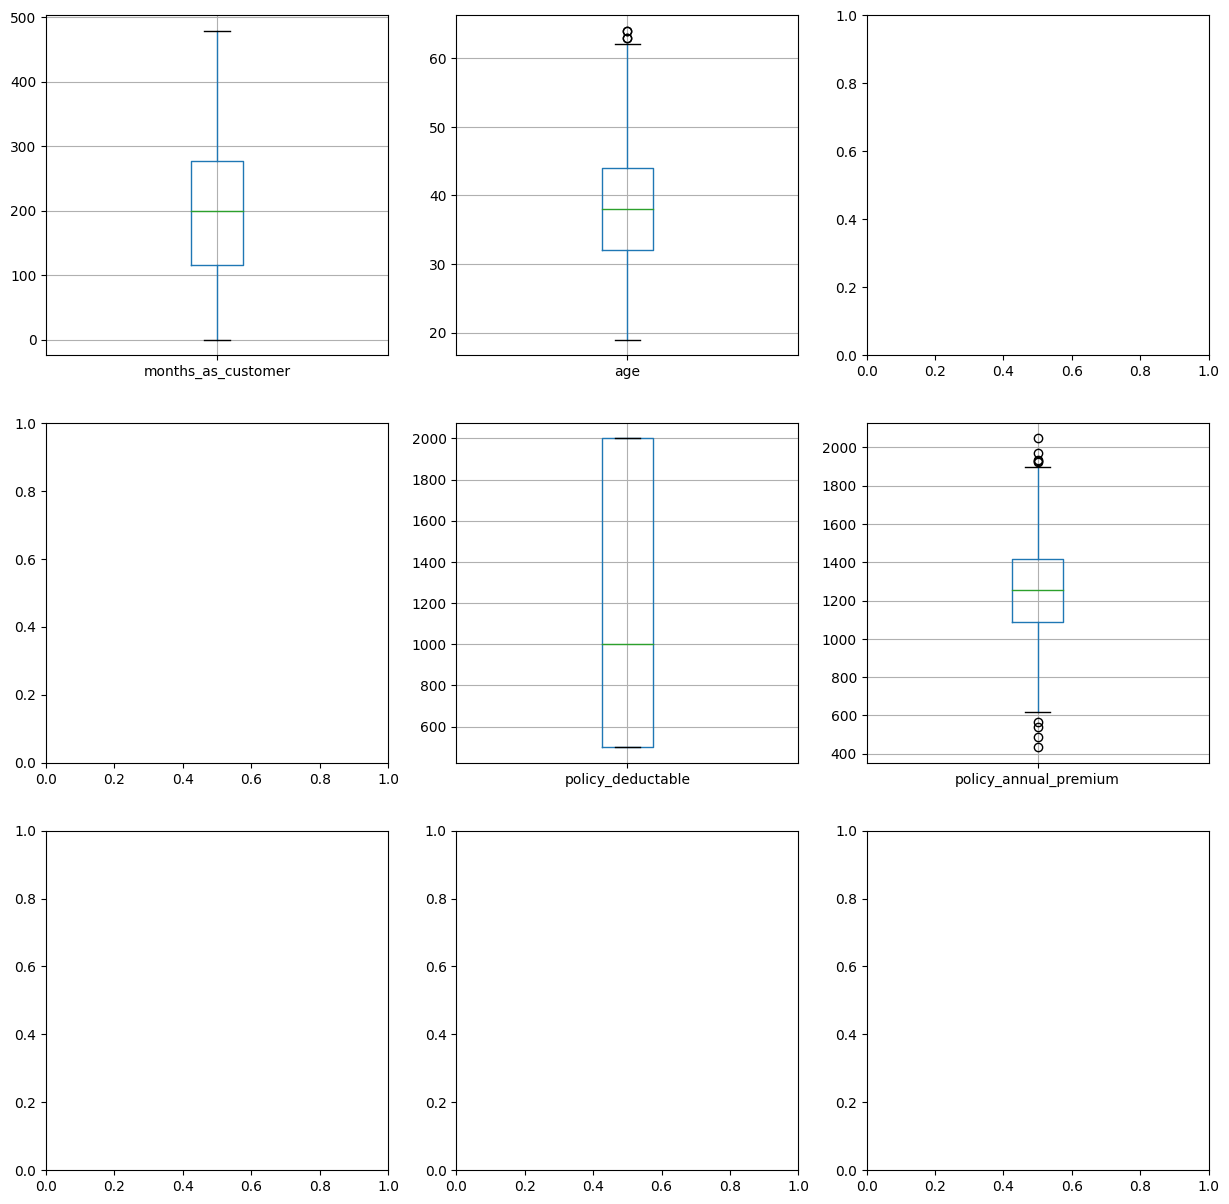

In [ ]:
# boxplot in subplots for every non-object column in a single plot
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for variable, subplot in zip(df.columns, ax.flatten()):
    if df[variable].dtypes != 'object':
        df.boxplot(column=variable, ax=subplot)

In [ ]:
# remove outliers via quantiles for every non-object column
for col in df.columns:
    if col == "umbrella_limit":
        continue
    if df[col].dtypes != 'object':
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Identify all categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to all categorical columns
label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df.skew()

,0
months_as_customer,0.328857
age,0.413325
policy_state,-0.036339
policy_csl,0.094989
policy_deductable,0.468672
policy_annual_premium,-0.001380
insured_sex,0.150086
insured_education_level,0.004976
insured_occupation,-0.063330
capital-gains,0.471704


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 977 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           977 non-null    int64  
 1   age                          977 non-null    int64  
 2   policy_state                 977 non-null    int64  
 3   policy_csl                   977 non-null    int64  
 4   policy_deductable            977 non-null    int64  
 5   policy_annual_premium        977 non-null    float64
 6   insured_sex                  977 non-null    int64  
 7   insured_education_level      977 non-null    int64  
 8   insured_occupation           977 non-null    int64  
 9   capital-gains                977 non-null    int64  
 10  capital-loss                 977 non-null    int64  
 11  incident_type                977 non-null    int64  
 12  collision_type               977 non-null    int64  
 13  incident_severity        

In [ ]:
label_encoder = LabelEncoder()
df['fraud_reported'] = label_encoder.fit_transform(df['fraud_reported'])

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

In [ ]:
# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results[name] = {
        "Accuracy": accuracy,
        "Classification Report": report
    }

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: Use

In [ ]:
print(f"\nModel: {name}")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))



Model: XGBoost
Accuracy: 0.7602040816326531
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       148
           1       0.51      0.38      0.43        48

    accuracy                           0.76       196
   macro avg       0.66      0.63      0.64       196
weighted avg       0.74      0.76      0.75       196



In [ ]:
for name, result in results.items():
    print(f"{name}: Accuracy = {result['Accuracy']}")

Logistic Regression: Accuracy = 0.7602040816326531
Random Forest: Accuracy = 0.7704081632653061
SVM: Accuracy = 0.7551020408163265
K-Nearest Neighbors: Accuracy = 0.7346938775510204
Naive Bayes: Accuracy = 0.7346938775510204
Decision Tree: Accuracy = 0.6989795918367347
XGBoost: Accuracy = 0.7602040816326531


In [ ]:
#decision tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
params = {"max_depth": [3,4,5,6] ,"min_samples_split" : [2,3,4,5,6,7,8]}
tree = DecisionTreeClassifier()
grid = GridSearchCV(tree, params, cv=5)
grid.fit(X_train, y_train)
grid.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [ ]:
tree = DecisionTreeClassifier(max_depth=3, min_samples_split=2)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8010204081632653

In [ ]:
#apply grid search
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
params = {"max_depth": [3, 4, 5, 6, 7, 8, 9, 10] , "eta" :[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
xgb = XGBClassifier()
grid = GridSearchCV(xgb, params, cv=5)
grid.fit(X_train, y_train)
grid.best_params_


{'eta': 0.5, 'max_depth': 10}

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eta=0.4, max_depth=5)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.4, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
xgb.score(X_test, y_test)

0.7653061224489796